In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
for zzz in range(0, 100):
    qq = input("Choose first class (0-sepal length; 1-sepal width; 2-petal length; 3-petal width)")
    ttt = ""

    if int(qq) == 0:
        ttt = "Choose second class (1-sepal width; 2-petal length; 3-petal width)"
        ww = input(ttt)
        if int(ww) > -1 and int(ww) < 4 and int(ww) != int(qq):
            break

    elif int(qq) == 1:
        ttt = "Choose second class (0-sepal length; 2-petal length; 3-petal width)"
        ww = input(ttt)
        if int(ww) > -1 and int(ww) < 4 and int(ww) != int(qq):
            break

    elif int(qq) == 2:
        ttt = "Choose second class (0-sepal length; 1-sepal width; 3-petal width)"
        ww = input(ttt)
        if int(ww) > -1 and int(ww) < 4 and int(ww) != int(qq):
            break

    elif int(qq) == 3:
        ttt = "Choose second class (0-sepal length; 1-sepal width; 2-petal length)"
        ww = input(ttt)
        if int(ww) > -1 and int(ww) < 4 and int(ww) != int(qq):
            break

patterns = []
classes = []

filename = 'Iris_data.txt'
file = open(filename,'r')

for line in file.readlines():
    row = line.strip().split(',')
    patterns.append([row[int(qq)], row[int(ww)]])
    classes.append(row[4])

patterns = np.asarray(patterns,dtype=np.float32)


def mapunits(input_len, size='small'):

    heuristic_map_units = 5 * input_len ** 0.54321

    if size == 'big':
        heuristic_map_units = 4 * (heuristic_map_units)
    else:
        heuristic_map_units = 0.25 * (heuristic_map_units)

    return heuristic_map_units


map_units = mapunits(len(patterns), size='big')

input_dimensions = 2
map_width = 9
map_height = 5
MAP = np.random.uniform(size=(map_height, map_width, input_dimensions))
prev_MAP = np.zeros((map_height, map_width, input_dimensions))

radius0 = max(map_width, map_height) / 2 #sigma
learning_rate0 = 0.1


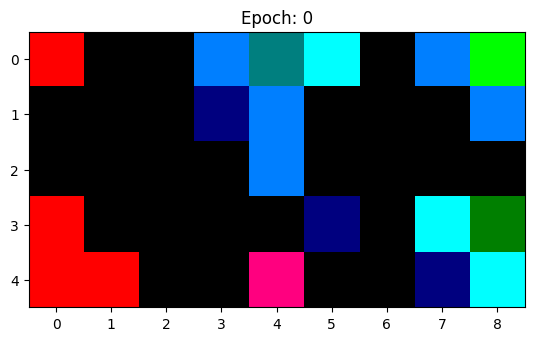

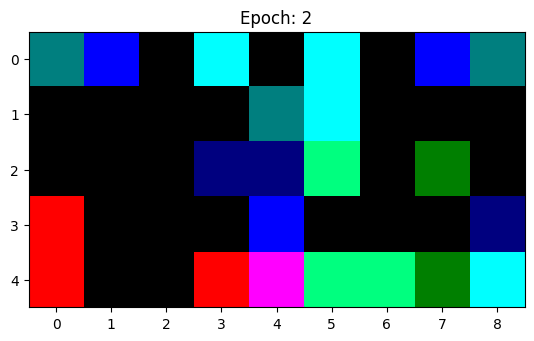

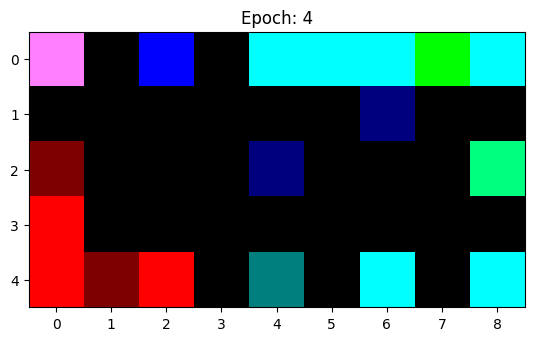

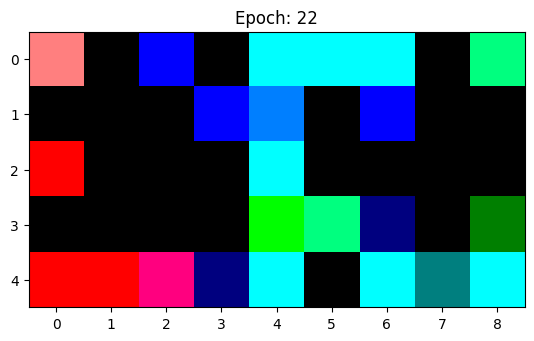

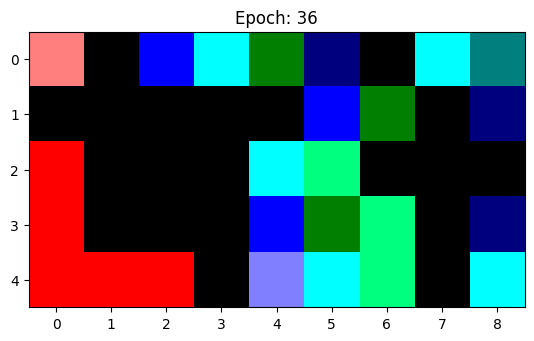

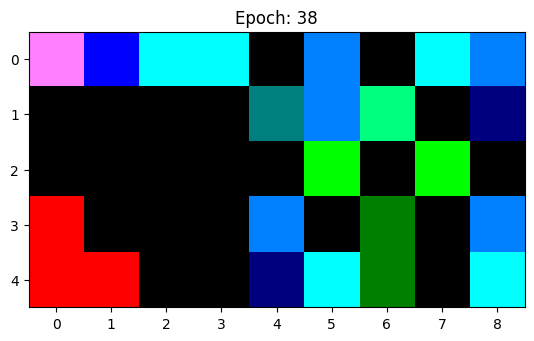

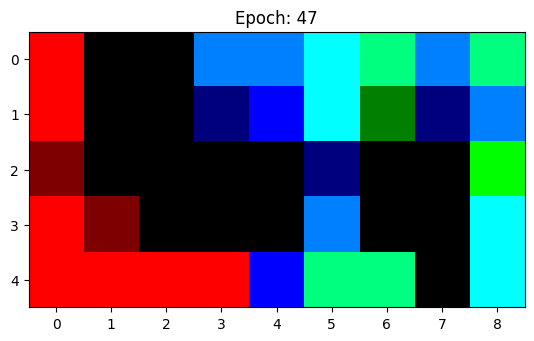

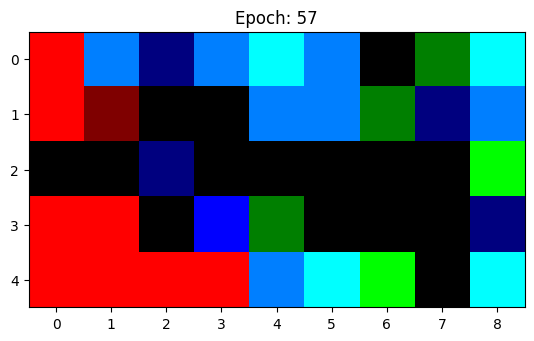

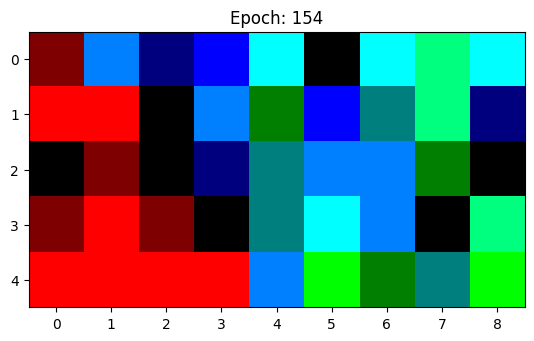

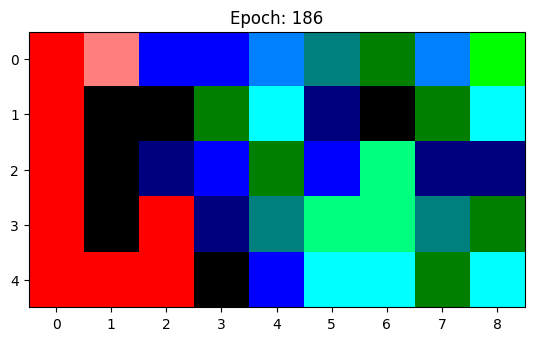

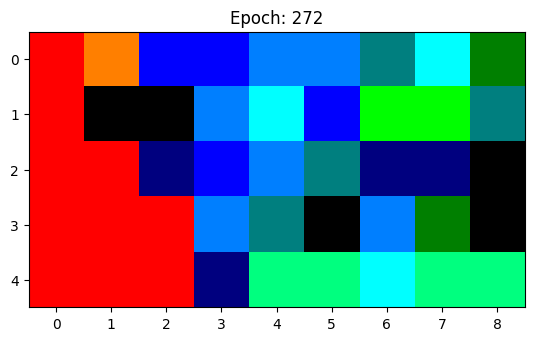

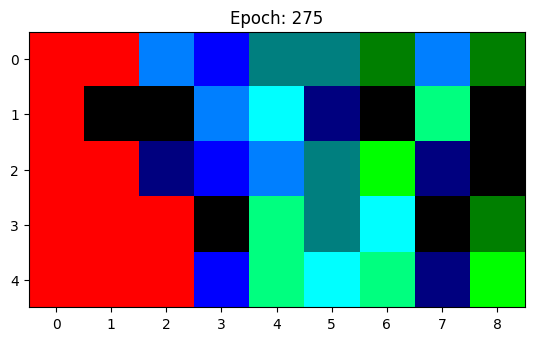

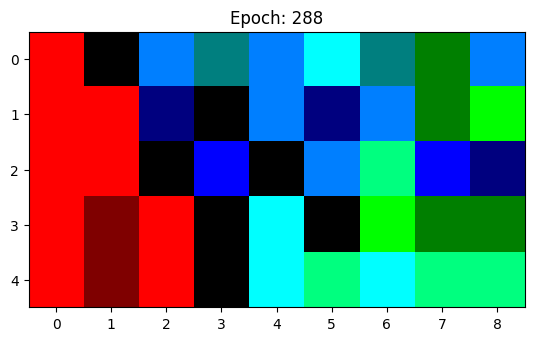

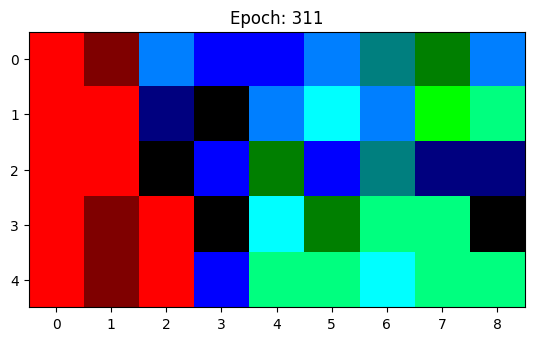

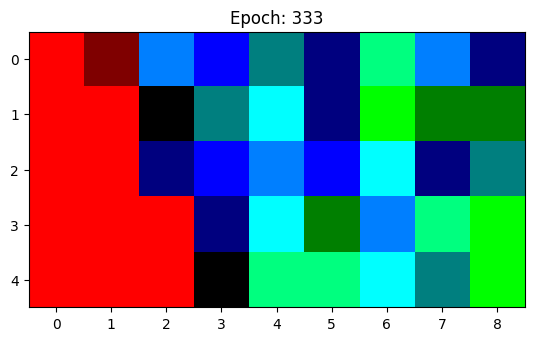

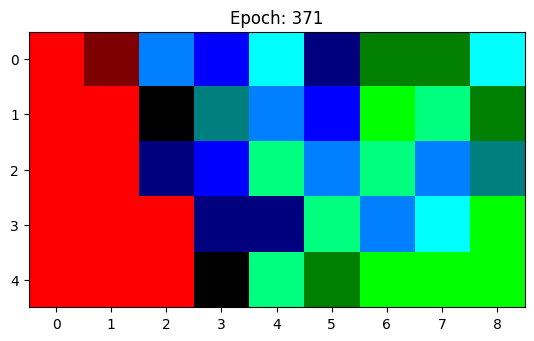

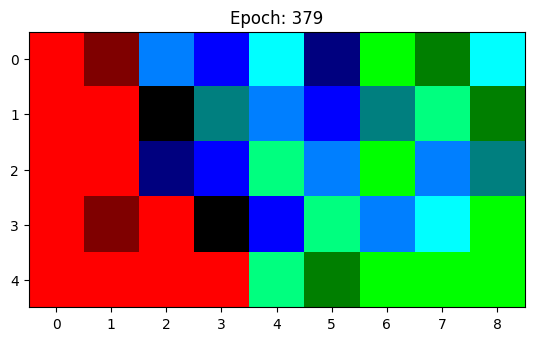

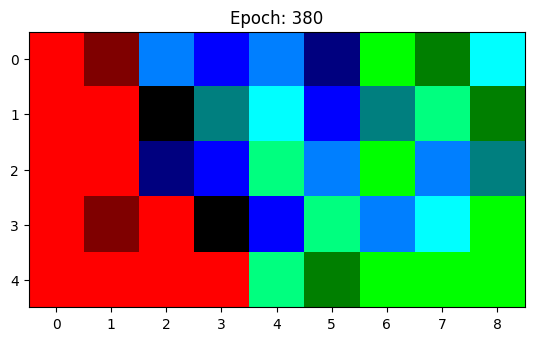

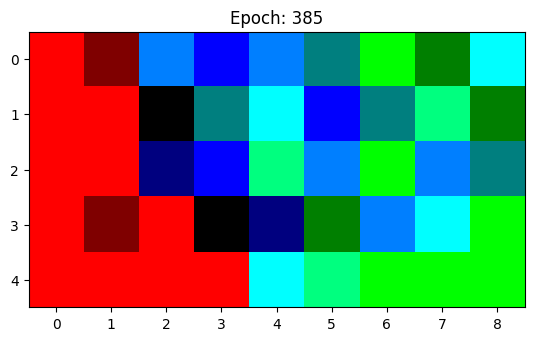

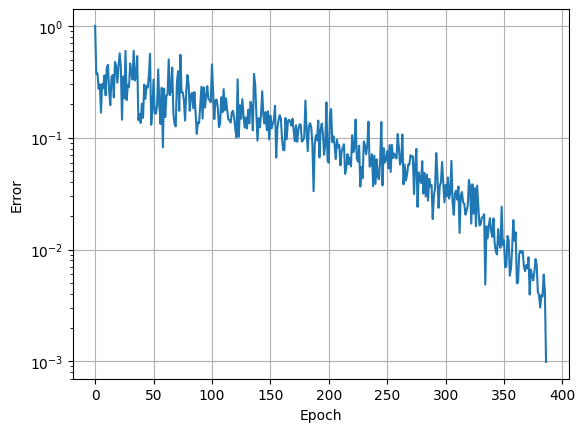

Final error: 0.0009875324106648985
Neighbourhood radius: 1.71871582186777
Red = Iris-Setosa
Blue = Iris-Virginica
Green = Iris-Versicolor


In [3]:
epochs = 400
radius = radius0
learning_rate = learning_rate0

convergence = [1]
e = 0.001
flag = 0

for epoch in range(epochs):

    shuffle = np.random.randint(len(patterns), size=len(patterns))
    for i in range(len(patterns)):

        J = np.linalg.norm(MAP - prev_MAP)

        if J <= e:
            flag = 1
            break
        else:
            pattern = patterns[shuffle[i]]
            pattern_ary = np.tile(pattern, (map_height, map_width, 1))
            Eucli_MAP = np.linalg.norm(pattern_ary - MAP, axis=2)

            BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)

            prev_MAP = np.copy(MAP)

            for i in range(map_height):
                for j in range(map_width):
                    distance = np.linalg.norm([i - BMU[0], j - BMU[1]])
                    if distance <= radius:
                        MAP[i][j] = MAP[i][j] + learning_rate * (pattern - MAP[i][j]) #theta
            learning_rate = learning_rate0 * (1 - (epoch / epochs))
            radius = radius0 * math.exp(-epoch / epochs)


    if J < min(convergence):
        BMU = np.zeros([2], dtype=np.int32)
        result_map = np.zeros([map_height, map_width, 3], dtype=np.float32)
        n = 0
        for pattern in patterns:

            pattern_ary = np.tile(pattern, (map_height, map_width, 1))
            Eucli_MAP = np.linalg.norm(pattern_ary - MAP, axis=2)

            BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)

            x = BMU[0]
            y = BMU[1]

            if classes[n] == 'Iris-setosa':
                if result_map[x][y][0] <= 0.5:
                    result_map[x][y] += np.asarray([0.5, 0, 0])
            elif classes[n] == 'Iris-virginica':
                if result_map[x][y][1] <= 0.5:
                    result_map[x][y] += np.asarray([0, 0.5, 0])
            elif classes[n] == 'Iris-versicolor':
                if result_map[x][y][2] <= 0.5:
                    result_map[x][y] += np.asarray([0, 0, 0.5])
            if n == 150:
                n = 0
                break
            else:
                n += 1

        result_map = np.flip(result_map, 0)
        res = cv2.imwrite('Result Image.png', result_map)


        plt.title(f'Epoch: {epoch}')
        plt.imshow(result_map)
        plt.show()

    convergence.append(J)

    if flag == 1:
        break


plt.plot(convergence)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.grid(True)
plt.yscale('log')
plt.show()

print('Final error: ' + str(J))
print('Neighbourhood radius: ' + str(radius))

print("Red = Iris-Setosa")
print("Blue = Iris-Virginica")
print("Green = Iris-Versicolor")
